# Stochastic Simulation of Chemical Reactions
**Prepared by:** Raghav Saxena (rsaxena@nd.edu) and Sarah Nano (snano@nd.edu)

**Reference:** [Chemical Reactor Analysis and Design Fundamentals by Rawlings et al. (Nob Hill Pub, LLC, 2002)](https://sites.engineering.ucsb.edu/~jbraw/chemreacfun/)

**Intended Audience:** This problem is intended for Chemical and Biomolecular Engineering juniors and seniors from the University of Notre Dame who are either enrolled in or have taken Reaction Engineering.


## Learning Objectives

After studying this notebook, completing the activities, and asking questions in class, you should be able to:

*   Understand stochastic simulations and how to use them to model chemical reactions. 
*   Highlight similarities and differences between stochastic and deterministic rate models for chemical reactions.
*   Properly graph and visualize data using matplotlib. 

## Coding Resources
Relevant Modules in Class Website: 

*   [Functions and Scope](https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-and-Scope.html)
*   [Visualization with matplotlib](https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html)
*   [Preparing Publication Quality Figures in Python](https://ndcbe.github.io/data-and-computing/notebooks/01/Publication-Quality-Figures.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Introduction


Kinetic reactions are mostly modeled using deterministic rate laws, which involve solving nonlinear differential equations. Deterministic models work excellently with large systems involving many thousands of atoms.


However, in some cases, we might want to model systems with only a few hundred atoms, such as when modeling reactions at an interface or a catalyst surface. For such systems, the random behavior of the molecules becomes essential. Such systems can be modeled using random simulation techniques (also called kinetic monte carlo) which we explain later below in detail.  

**The objectives of this excercise are:**

1. To perform random simulation on a two reaction batch system using Gillespie algorithm.

2. Compare reaction profiles (concentrations vs. time) from random simulation with those of deterministic rate laws.

3. Explore effect of number of molecules and rate constant on reaction profiles from Gillespie algorithm.

4. Discuss similarities and differences between the rate law model and the random simulation model.

## 1a. Random Simulation - Gillespie Algorithm
In a random simulation, one can directly capture the random nature of molecules by using random molecular motion and probability of collision as the basis of reaction rates. 

Through this exercise, we will highlight similarities and differences between a random simulation model and a deterministic model.

We will use the following two reaction constant volume batch system for the purpose of this excercise.
\begin{equation}
A \xrightarrow{k_1} B
\end{equation}
\begin{equation}
B \xrightarrow{k_2} C
\end{equation}

For stochastic (random) modeling, the systems are generally small and consist of about a few hundred molecules. Thus, we will model the system using the exact number of molecules instead of using concentrations. We will assume that these reactions are actual molecular events, i.e., a molecule of A converts to B in the first reaction, and a molecule of B converts to C in the second reaction. 

Which reaction takes place is governed by their probabilities; this is proportional to the rate constant and the number of molecules as shown below: 

\begin{equation}
r1 = k_1x_a
\end{equation}
\begin{equation}
r2 = k_2x_b
\end{equation}

These reaction probabilities look very similar to rate equations from the deterministic models. However, **x$_i$** is the number of component **$i$** molecules in the reactor volume, not concentration **C$_i$**.  

Given these reaction probabilities, we will simulate the random behavior of this reaction network using the Gillespie algorithm. The basic idea behind the Gillespie algorithm is to (i) randomly choose the time at which next reaction occurs and (ii) randomly choose which reaction occurs at that time. The choice is not made completely randomly but rather using reaction probabilities. The following protocol describes the Gillespie algorithm: 

1.   Initialize the number of starting molecules x$_i$ for each species in the reaction network.
2.   Compute total reaction probability, $r_{tot} = \sum r_ix_i$, it is intuitive that higher total reaction probability would mean time to next reaction is small.
3.   Select two random numbers, p1, p2, from a uniform distribution on the interval (0,1).
4.   Compute the time to next reaction $\tau = -ln(p1)/r_{tot}$.
5.   Select the reaction that takes place at this time. The idea here is to partiton interval (0,1) by relative sizes of individual reaction probabilities, then select the reaction that occurs using randomly generated number p2.
6.   Update reaction time $t = t + \tau$  and adjust number of molecules x$_i$ for each species. For example, if reaction 1 is selected in step 5, we will reduce number of A molecules by 1 and increase number of B molecules by 1.
7.   Return to step 2 and continue until total reaction probability is zero.

## 2. Random Simulation Model - Gillespie Algorithm
Complete the function "gillespie" to perform stochastic simulation of the two reaction batch system. 
\begin{equation}
A \xrightarrow{k_1} B
\end{equation}
\begin{equation}
B \xrightarrow{k_2} C
\end{equation}
**Write a pseudocode for the while loop to complete the code.**  Submit this answer on an attached pdf file. 

In [ ]:
def gillespie(k1, k2, A, B, C):
    """
    Function to implement Gillespie algorithm to perform stochastic simulation of the two reaction batch system

    Arguments:
    k1,k2: Reaction rate constants of the two reactions
    A,B,C: Initial number of A, B and C molecules

    Returns:
    y: A numpy array of simulation time and number of A, B and C molecules
    """
    # Random Simulation using Gillespie algorithm

    # Index counter
    n = 0

    # Initialize list for storing simulation time
    time = [0]

    # Initialize list for storing number of A, B and C molecules
    x_a = [A]
    x_b = [B]
    x_c = [C]

    # Total reaction probability at time t = 0
    r1 = k1 * x_a[0]
    r2 = k2 * x_b[0]
    rtot = r1 + r2

    while rtot != 0:
        ### BEGIN SOLUTION ###

        # Generating two random numbers from a uniform distribution between 0 and 1
        p = np.random.rand(2, 1)

        # Time to next reaction event using one of the two generated random numbers
        tau = -np.log(p[0, 0]) / rtot

        # Determining which reaction to take place at that time using other random number

        if p[1, 0] < r1 / rtot:
            # This means reaction A-->B takes place. Adjusting the number of molecules
            x_a.append(x_a[n] - 1)
            x_b.append(x_b[n] + 1)
            x_c.append(x_c[n])

        else:
            # This means reaction B-->C takes place. Adjusting the number of molecules
            x_a.append(x_a[n])
            x_b.append(x_b[n] - 1)
            x_c.append(x_c[n] + 1)

        # Update simulation time with tau every iteration
        time.append(time[n] + tau)

        # Update index counter
        n += 1

        # Update total reaction probability
        r1 = k1 * x_a[n]
        r2 = k2 * x_b[n]
        rtot = r1 + r2

    # Make a numpy array of simulation time, and number of A, B and C molecules.
    y = np.array([time, x_a, x_b, x_c])

    ### END SOLUTION ###

    return y

Initialize the number of molecules and rate constants in the next block and then run the gillespie function. Plot the number of molecules of A, B, and C over time. 

In [ ]:
# Define initial number of molecules and rate constants

k1 = 0.5  # s-1
k2 = 1  # s-1
A = 1000
B = 0
C = 0

In [ ]:
# Run gillespie function

x = gillespie(k1, k2, A, B, C)
time = x[0]
xa = x[1]
xb = x[2]
xc = x[3]

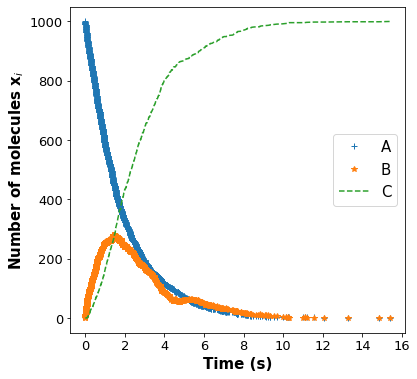

In [ ]:
# Plot number of A, B and C molecules vs Simulation time

### BEGIN SOLUTION ###
fig = plt.figure(figsize=(6, 6))
plt.plot(time, xa, "+", label=r"A")
plt.plot(time, xb, "*", label=r"B")
plt.plot(time, xc, "--", label=r"C")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of molecules x$_i$", fontsize=15, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=15)
### END SOLUTION ###

## 3a. Deterministic Equations
Deterministic rate model for the same reaction network would result in the following rate expressions: 
\begin{equation}
r1 = k_1C_a
\end{equation}
\begin{equation}
r2 = k_2C_b
\end{equation}

Where $C_i$ is the concentration of species $i$, unlike number of molecules of stochastic model.

**Using these rate laws, write down the differential equations for the concentration of each species?** Submit this answer on an attached pdf file.

**Answer:**
\begin{equation}
\frac{dC_a}{dt} = -k_1C_a
\end{equation}
\begin{equation}
\frac{dC_b}{dt} = k_1C_a - k_2C_b
\end{equation}
\begin{equation}
\frac{dC_c}{dt} = k_2C_b
\end{equation}

Note: These equations would be exactly same for number of molecules, i.e, one can replace $C_i$ with $x_i$ in the differential equations above. Concentrations can be converetd to number of molecules using avogadros number $N_A$ and volume V of the reactor and these constants will cancel out in the equations.

## 3b. Deterministic Rate Model - Solving Differential Equations

**Solve the differential equations to find the analytical solution of the deterministic rate models.** Submit this answer on an attached pdf file. Add these solutions to the code below to plot this deterministic rate model profiles.

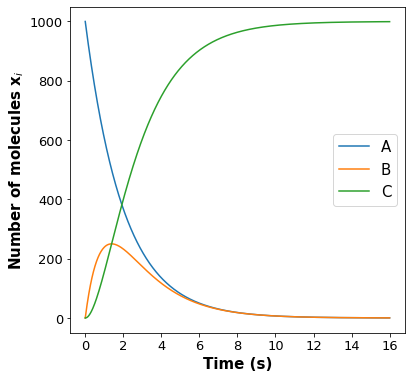

In [ ]:
# Analytical solution from solving differential equations of deterministic rate models
# These models were solved mathematically on paper and in this section we are just plotting the obtained solutions

t = np.linspace(0, 16, 1000)

X_a = xa[0] * np.exp(-k1 * t)


if k1 == k2:
    X_b = xa[0] * k1 * t * np.exp(-k1 * t)
    X_c = xa[0] * (
        1 + (k1**2) * (-t * (np.exp(-k1 * t) / k1) - (np.exp(-k1 * t) / k1**2))
    )

else:
    X_b = xa[0] * (k1 / (k1 - k2)) * (np.exp(-k2 * t) - np.exp(-k1 * t))
    X_c = xa[0] * (
        1 + (k1 * k2 / (k1 - k2)) * ((np.exp(-k1 * t) / k1) - (np.exp(-k2 * t) / k2))
    )


# Plot deterministic solution of number of A, B and C molecules vs time

### BEGIN SOLUTION ###
fig = plt.figure(figsize=(6, 6))
plt.plot(t, X_a, label=r"A")
plt.plot(t, X_b, label=r"B")
plt.plot(t, X_c, label=r"C")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of molecules x$_i$", fontsize=15, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=15)
### END SOLUTION ###

## 3c. Stochastic vs Deterministic Solution
Plot the stochastic solution and deterministic solution for the species profiles in the same plot starting with 1000 molecules of A. **Write a few sentences to explain what you observe?** Submit your answer on an attached pdf file.

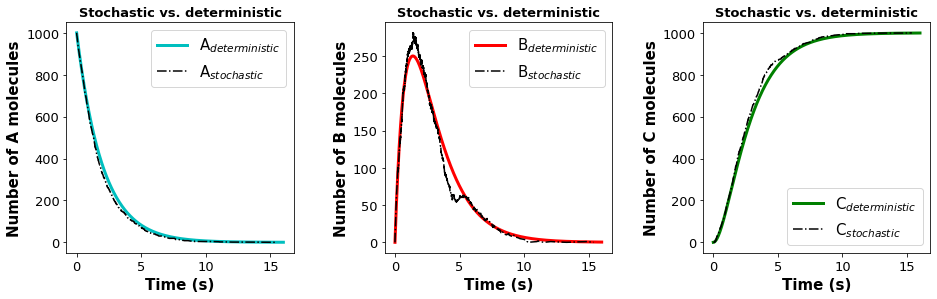

In [ ]:
### BEGIN SOLUTION ###

fig = plt.figure(figsize=(15, 4))

# Creating a subplot
plt.subplot(1, 3, 1)
plt.title("Stochastic vs. deterministic", fontsize=13, fontweight="bold")
plt.plot(t, X_a, "c", label=r"A$_{deterministic}$", linewidth=3)
plt.plot(time, xa, "k-.", label=r"A$_{stochastic}$")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of A molecules", fontsize=15, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=15)

plt.subplot(1, 3, 2)
plt.title("Stochastic vs. deterministic", fontsize=13, fontweight="bold")
plt.plot(t, X_b, "r", label=r"B$_{deterministic}$", linewidth=3)
plt.plot(time, xb, "k-.", label=r"B$_{stochastic}$")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of B molecules", fontsize=15, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=15)

plt.subplot(1, 3, 3)
plt.title("Stochastic vs. deterministic", fontsize=13, fontweight="bold")
plt.plot(t, X_c, "g", label=r"C$_{deterministic}$", linewidth=3)
plt.plot(time, xc, "k-.", label=r"C$_{stochastic}$")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of C molecules", fontsize=15, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=15)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### END SOLUTION ###

**Answer:** For N = 1000 molecules, we see that the profiles for the stochastic solution are similar to the deterministic solution with little noise. For even larger systems, the profiles will be even more accurate. Intuitively this is what we would expect; the random behavior becomes less important for large systems. In the next section, we will see that random behavior is important for small systems.

## 3d. Effect of number of molecules in stochastic simulation 


**How does changing the starting number of molecules affect the reaction profiles?** Run the gillespie function with A = 100 and A = 1000 molecules and create a subplot for the species profile. Submit this answer in a few sentences on an attached pdf file.

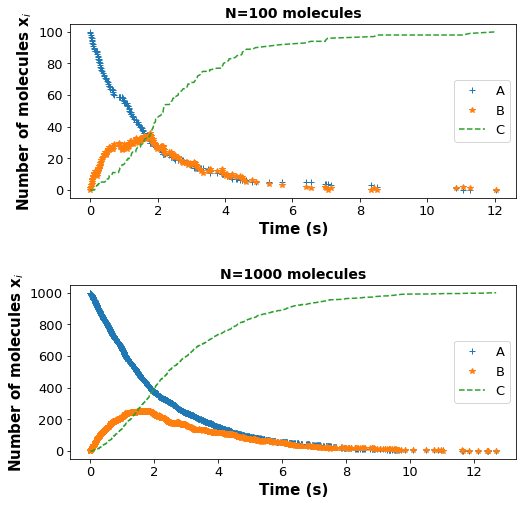

In [ ]:
### BEGIN SOLUTION ###

# stochastic model for with 100 total molecules
x = gillespie(k1, k2, 100, 0, 0)
# stochastic model for with 1000 total molecules
y = gillespie(k1, k2, 1000, 0, 0)

### END SOLUTION ###

# creating a subplot for the two stochastic simulations
fig = plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(x[0], x[1], "+", label=r"A")
plt.plot(x[0], x[2], "*", label=r"B")
plt.plot(x[0], x[3], "--", label=r"C")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of molecules x$_i$", fontsize=15, fontweight="bold")
plt.title("N=100 molecules", fontsize=14, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=13)

plt.subplot(2, 1, 2)
plt.plot(y[0], y[1], "+", label=r"A")
plt.plot(y[0], y[2], "*", label=r"B")
plt.plot(y[0], y[3], "--", label=r"C")
leg = plt.legend(fontsize=13)
plt.subplots_adjust(hspace=0.5)
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of molecules x$_i$", fontsize=15, fontweight="bold")
plt.title("N=1000 molecules", fontsize=14, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=13)

**Answer:** For N = 100 molecules, we can clearly see more noise in the species profile compared to N = 1000 molecules, where the profile is more smooth and closer to the analytical solution. This reinforces our idea that stochastic modeling is important if the system of interest is small.

## 4. Effect of rate constants k1 and k2
Plot reaction profiles using different rate constant values (using the same number of starting molecules. *Hint:* Change the value of one rate constant while keeping the other the same; this will make any changes obvious.


**How does changing the rate constant affect the reaction profiles?** Submit this answer in a few sentences on an attached pdf file.

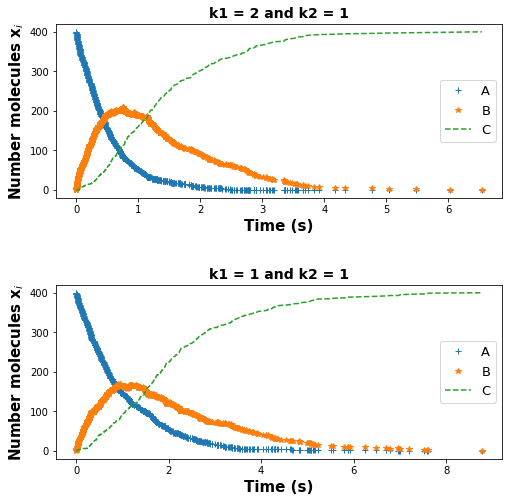

In [ ]:
### BEGIN SOLUTION ###

# stochastic model with 400 total molecules, k1 = 2 and k2 = 1
e = gillespie(2, 1, 400, 0, 0)
# stochastic model with 400 total molecules, k1 = 1 and k2 = 1
f = gillespie(1, 1, 400, 0, 0)

### END SOLUTION ###

# creating a subplot for the two stochastic simulations
fig = plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(e[0], e[1], "+", label=r"A")
plt.plot(e[0], e[2], "*", label=r"B")
plt.plot(e[0], e[3], "--", label=r"C")
leg = plt.legend(fontsize=15)
plt.title("k1 = 2 and k2 = 1", fontsize=14, fontweight="bold")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number molecules x$_i$", fontsize=15, fontweight="bold")
leg = plt.legend(fontsize=13)

plt.subplot(2, 1, 2)
plt.plot(f[0], f[1], "+", label=r"A")
plt.plot(f[0], f[2], "*", label=r"B")
plt.plot(f[0], f[3], "--", label=r"C")
plt.subplots_adjust(hspace=0.5)
leg = plt.legend(fontsize=15)
plt.title("k1 = 1 and k2 = 1", fontsize=14, fontweight="bold")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number molecules x$_i$", fontsize=15, fontweight="bold")
leg = plt.legend(fontsize=13)

**Answer:** We see that for the top figure with higher k1, the maximum in B was reached faster and in a steeper way than the bottom figure with lower k1; this makes sense because a higher k1 means a higher probability of the first reaction, meaning faster conversion of A to B molecules. With the same logic, we can explain the decay in A and growth in C is also fast in the top figure compared to the bottom figure. 

All of these characteristics would also be expected in the deterministic model. This exercise shows us the beauty of the Gillespie algorithm and how it can capture features of deterministic models while keeping the random behavior of the system into account.

## 5. Final Discussion

Through this project, we aimed to highlight the importance of stochastic (random) modeling (aka KMC simulations in the present time). We used the famous Gillespie algorithm for stochastic modeling and compared it to well-known deterministic reaction engineering models for a simple two irreversible reactions constant volume batch system. We showed that the stochastic solution has more noise in the profiles for smaller systems because of the random behavior of the molecules moving in the gas phase and colliding with each other. We showed that this random behavior becomes less critical for larger systems, and profiles were closer to deterministic models as captured by the Gillespie algorithm.  